In [1]:
import numpy as np
import simulation
import random
import pickle
from tqdm import tqdm

In [2]:
def simulate_random(n, bubble_sizes, n_samples=128, out_channels=2, alpha_major=1.11e-4, alpha_minor=1.9e-5, dt=0.01):
    if bubble_sizes is None:
        bubble_sizes = [1]

    data = []

    for i in tqdm(range(n_samples)):
        size = random.choice(bubble_sizes)

        xyz_bubble = np.random.randint(1, n-size, size=3)
        bubble = np.stack([xyz_bubble, xyz_bubble+size], axis=1)

        label = np.concatenate([bubble.mean(axis=1)/n, [size/n]])

        alpha = np.ones((n, n, n)) * alpha_major
        alpha[bubble[0,0]:bubble[0,1],bubble[1,0]:bubble[1,1],bubble[2,0]:bubble[2,1]] = alpha_minor
        T = simulation.simulate_heat_conduction(alpha, out_channels=out_channels, t_diff=5, dt=dt)

        data.append((T, label)) 
        
    return data

In [6]:
alpha_Cu = 1.11e-4
alpha_air = 1.9e-5

data=simulate_random(n=32, bubble_sizes=[1,2,3,4,5], n_samples=1024, out_channels=2, alpha_major=alpha_Cu, alpha_minor=alpha_air, dt=0.01)
#data=simulate_random(n=64, bubble_sizes=[2,3,4,5,6,7,8,9,10], n_samples=64, out_channels=2, alpha_major=alpha_Cu, alpha_minor=alpha_air, dt=0.0025)

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [06:57<00:00,  2.45it/s]


In [9]:
filename = f'./data/heat_cond_data_n32_2.pickle'
with open(filename, mode='wb') as output_file:
    pickle.dump(data, output_file)

[0.625   0.65625 0.1875  0.125  ]


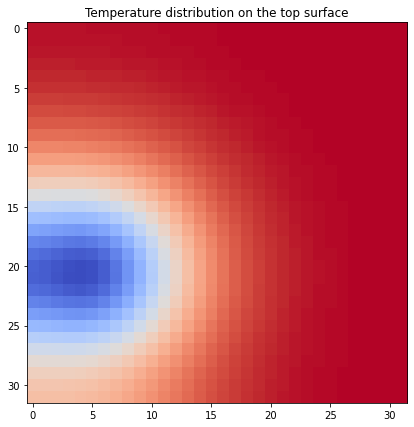

In [42]:
t, l = data[0]
print(l)
simulation.plot_top_temperature(t, 0)